In [21]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pylab as pl
from IPython import display
import time
import random
import scipy.fftpack
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate


---
# VIDEO: How the 2D FFT works
---


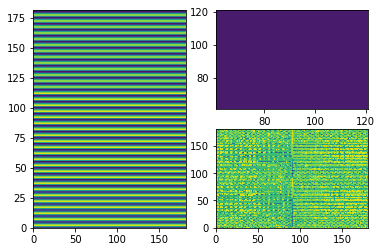

In [28]:
## movie to illustrate frequencies

# specify vector of sine frequencies
sinefreq = np.linspace(.0001,.2,50) # arbitrary units


# leave this fixed for now
sinephas = np.pi/2


# sine wave initializations
lims  = [-91,91]
[x,y] = np.meshgrid(range(lims[0],lims[1]),range(lims[0],lims[1]))
xp    = x*np.cos(sinephas) + y*np.sin(sinephas)


for si in range(0,len(sinefreq)):
    
    # compute sine wave
    img = np.sin( 2*np.pi*sinefreq[si]*xp )
    
    # 2D FFT and extract power and phase spectra
    imgX  = scipy.fftpack.fftshift(scipy.fftpack.fft2(img))
    
    powr2 = np.abs(imgX)
    phas2 = np.angle(imgX)
    
    
    # show original image
    pl.cla() # wipe the figure
    plt.subplot2grid((1,2),(0,0))
    plt.contourf(img)
    
    # show amplitude spectrum
    plt.subplot2grid((2,2),(0,1))
    plt.contourf(powr2)
    plt.xlim([61,121])
    plt.ylim([61,121])
    
    # show phase spectrum
    plt.subplot2grid((2,2),(1,1))
    plt.contourf(phas2)
    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(.01)


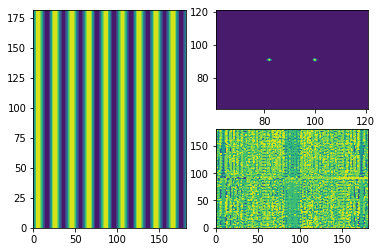

In [30]:
## movie to illustrate phases

# specify vector of sine gradient phases
sinephas = np.linspace(0,np.pi,50) # arbitrary units

# leave this fixed for now
sinefreq = .05


# sine wave initializations
lims  = [-91,91]
[x,y] = np.meshgrid(range(lims[0],lims[1]),range(lims[0],lims[1]))


for si in range(0,len(sinephas)):
    
    # compute sine wave
    xp  = x*np.cos(sinephas[si]) + y*np.sin(sinephas[si])
    img = np.sin( 2*np.pi*sinefreq*xp )
    
    # 2D FFT and extract power and phase spectra
    imgX  = scipy.fftpack.fftshift(scipy.fftpack.fft2(img))
    
    powr2 = np.abs(imgX)
    phas2 = np.angle(imgX)
    
    
    # show original image
    pl.cla() # wipe the figure
    plt.subplot2grid((1,2),(0,0))
    plt.contourf(img)
    
    # show amplitude spectrum
    plt.subplot2grid((2,2),(0,1))
    plt.contourf(powr2)
    plt.xlim([61,121])
    plt.ylim([61,121])
    
    # show phase spectrum
    plt.subplot2grid((2,2),(1,1))
    plt.contourf(phas2)
    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(.01)


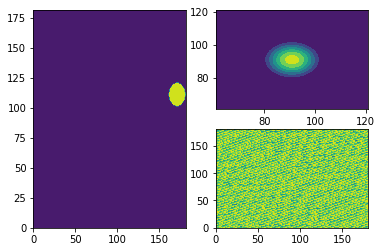

In [34]:
## physical location

width = 20 # width of Gaussian
centlocs = np.linspace(-80,80,50)

for si in range(0,len(centlocs)):
    
    # create Gaussian
    mx = x-centlocs[si]
    my = y-20
    
    gaus2d = np.exp( -( mx**2 + my**2 ) / (2*width**2) )
    img = np.zeros((len(gaus2d),len(gaus2d)))
    img[gaus2d>.9] = 1
    
    # 2D FFT and extract power and phase spectra
    imgX  = scipy.fftpack.fftshift(scipy.fftpack.fft2(img))
    
    powr2 = np.abs(imgX)
    phas2 = np.angle(imgX)
    
    
    # show original image
    pl.cla() # wipe the figure
    plt.subplot2grid((1,2),(0,0))
    plt.contourf(img)
    
    # show amplitude spectrum
    plt.subplot2grid((2,2),(0,1))
    plt.contourf(powr2)
    plt.xlim([61,121])
    plt.ylim([61,121])
    
    # show phase spectrum
    plt.subplot2grid((2,2),(1,1))
    plt.contourf(phas2)
    
    display.clear_output(wait=True)
    display.display(pl.gcf())
    time.sleep(.01)
    

